In [10]:
import numpy as np
import cv2 as cv2
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt

In [17]:
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

In [21]:
resized = cv2.resize(image, (int(image.shape[1]/5), int(image.shape[0]/5)))
cv2.imshow('resized', resized)
cv2.waitKey(0)

-1

In [39]:
image = cv2.imread('thresoldimg.jpg')

In [25]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

In [26]:
cv2.imshow("Gray",gray)
cv2.waitKey(0)

-1

In [27]:
#simple thresholding

In [40]:
def simpleThresh(gray):
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    T, thresh1 = cv2.threshold(blur, 75, 255, cv2.THRESH_BINARY)
    T, thresh2 = cv2.threshold(blur, 75, 255, cv2.THRESH_BINARY_INV)
    masked1 = cv2.bitwise_and(blur, blur, mask=thresh1)
    T, thresh4 = cv2.threshold(blur, 75, 255, cv2.THRESH_TOZERO)
    T, thresh5 = cv2.threshold(blur, 75, 255, cv2.THRESH_TOZERO_INV)

    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'MASK', 'TOZERO', 'TOZERO_INV']
    images = [gray, thresh1, thresh2, masked1, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()
    return thresh1

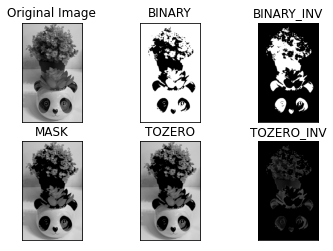

In [41]:
simpleThreshMask = simpleThresh(gray)

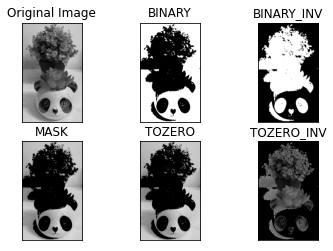

In [42]:
def simpleThresh(gray):
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    T, thresh1 = cv2.threshold(blur, 125, 255, cv2.THRESH_BINARY)
    T, thresh2 = cv2.threshold(blur, 125, 255, cv2.THRESH_BINARY_INV)
    masked1 = cv2.bitwise_and(blur, blur, mask=thresh1)
    T, thresh4 = cv2.threshold(blur, 125, 255, cv2.THRESH_TOZERO)
    T, thresh5 = cv2.threshold(blur, 125, 255, cv2.THRESH_TOZERO_INV)

    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'MASK', 'TOZERO', 'TOZERO_INV']
    images = [gray, thresh1, thresh2, masked1, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()
    return thresh1
simpleThreshMask = simpleThresh(gray)

In [45]:
def adaptiveThresh(img):
    img = cv2.medianBlur(img, 5)
    T, thresh1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                               cv2.THRESH_BINARY_INV, 29, 3)
    thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                               cv2.THRESH_BINARY_INV, 29, 3)
    titles = ['Original Image', 'Global Thresholding',
              'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, thresh1, thresh2, thresh3]
    for i in range(4):
        plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()
    return thresh2, thresh3

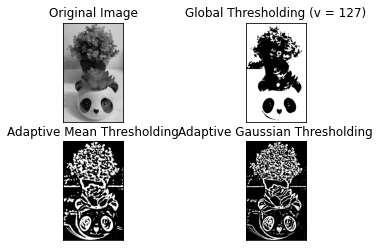

In [46]:
adaptiveThreshMask1, adaptiveThreshMask2 = adaptiveThresh(gray)

In [34]:
#Otsu Thresolding

In [55]:
def otsuThresh(img):
    T, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    # Otsu's thresholding
    T, thresh2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    T, thresh3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # plotting
    
    images = [img, 0, thresh1,
              img, 0, thresh2,
              blur, 0, thresh3]
    titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
              'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
              'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]
    for i in range(3):
        plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
        plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
      
        plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
        plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
    plt.show()
    return thresh2, thresh3

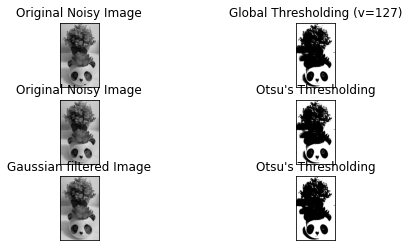

In [56]:
otsuThreshMask1, otsuThreshMask2 = otsuThresh(gray)

In [37]:
def imageSegment(image, mask, method):
    q=image.copy()
    foreground = cv2.bitwise_and(q, q, mask=mask)
    cv2.imwrite(f"{method}-foregroundExtraction.jpg", np.hstack([image, foreground]))
    cv2.waitKey(0)


In [38]:
imageSegment(gray, simpleThreshMask, "simple")
imageSegment(gray, otsuThreshMask2, "otsu")
imageSegment(gray, adaptiveThreshMask2, "adapt")